In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Load the dataset
movies = pd.read_csv('movies_metadata.csv', low_memory=False)


Data Cleaning

In [22]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')

movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['year'] = movies['release_date'].dt.year

movies = movies[(movies['budget'] > 0) & (movies['revenue'] > 0) & (movies['year'].notnull())]


Line Graph - Movies Release Per Year

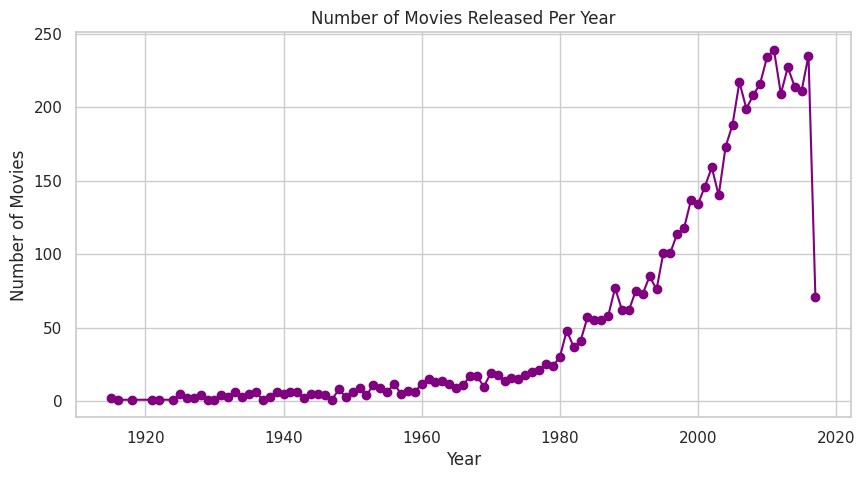

In [23]:
plt.figure()
movies_per_year = movies['year'].value_counts().sort_index()
movies_per_year.plot(kind='line', marker='o', color='purple')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Histogram - Budget

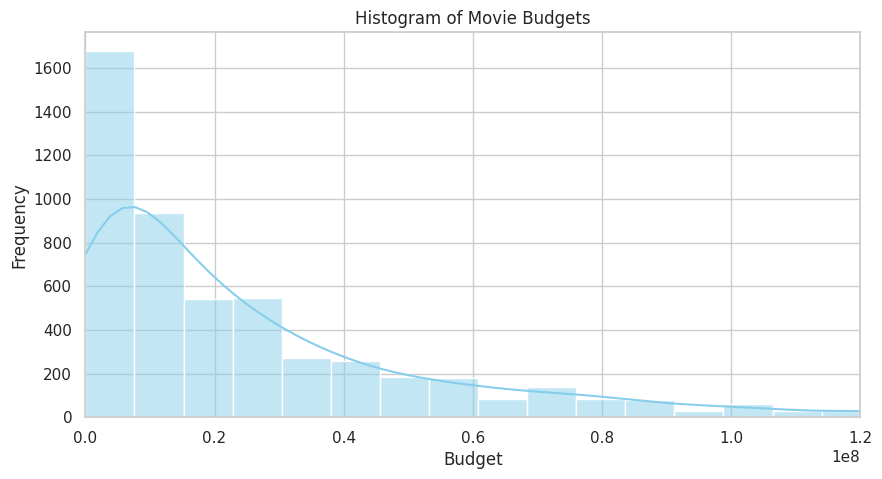

In [24]:
plt.figure()
sns.histplot(movies['budget'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.xlim(0, movies['budget'].quantile(0.95))
plt.show()


Histogram - Ratings

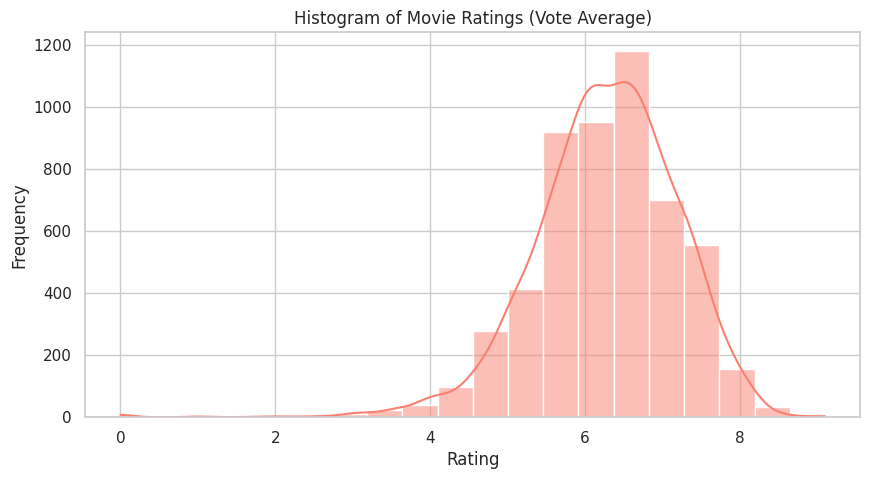

In [26]:
plt.figure()
sns.histplot(movies['vote_average'].dropna(), bins=20, kde=True, color='salmon')
plt.title('Histogram of Movie Ratings (Vote Average)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


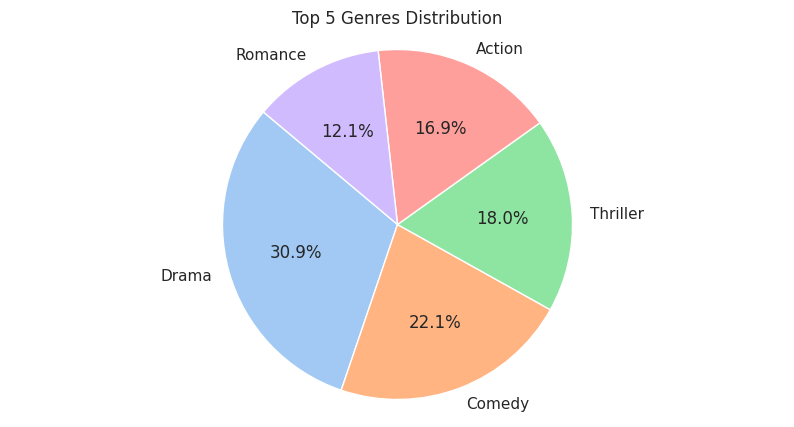

In [32]:
import ast

def extract_genre_names(genre_str):
    try:
        if pd.isna(genre_str):
            return []
        genres = ast.literal_eval(genre_str)
        if isinstance(genres, list):
            return [g['name'] for g in genres if 'name' in g]
        return []
    except Exception as e:
        return []

movies['genre_list'] = movies['genres'].apply(extract_genre_names)

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

all_genres = sum(movies['genre_list'], [])

genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(5)
labels, sizes = zip(*top_genres)

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Top 5 Genres Distribution')
plt.axis('equal')
plt.show()